<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_02_%EB%8B%A8%EC%96%B4%EB%B2%A1%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

### **<font color='orange'> Phase 2. 분석단계**

In [ ]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [ ]:
import pandas as pd

df = pd.read_pickle(path)
df

,일자,본문
0,2024-08-05,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,2024-09-17,"▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,2024-10-10,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,2024-10-12,<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,2024-07-18,집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...
...,...,...
36710,2024-08-15,윤석열 대통령이 서울 종로구 세종문화회관에서 열린 제79주년 광복절 경축식에서 경축...
36718,2024-07-29,"서울 사는 60대 남성 경찰, 가족 수소문\n\n경찰이 한강 하구에서 팔에 5㎏ 아..."
36880,2024-09-23,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...
36891,2024-07-17,지난주 많은 비를 뿌렸던 장맛비가 다시 내리기 시작하면서 보험사에 침수 피해를 신고...


In [ ]:
df = df.sample(frac=0.1)
df.shape

(1781, 2)

In [ ]:
! pip install konlpy --quiet

In [ ]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus = extract_words_from_corpus(df.sample(frac=0.1))
print(f"Corpus created successfully with {len(corpus)} words")
corpus[:10]
# ... (Rest of your code)

Extracting words: 100%|██████████| 178/178 [00:27<00:00,  6.39it/s]


Corpus created successfully with 6290 words


['분양', '가격', '분담', '포함', '미만', '면적', '지자체', '명칭', '사용', '한강']


- tf-idf 매트릭스 생성

In [ ]:
# prompt: df['본문']을 일자별 기사로 countvector를 만들어다오

from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['본문'] is your text data
vectorizer = CountVectorizer()

# Create the document-term matrix
dtm = vectorizer.fit_transform(df['본문'])

# Convert to DataFrame for better visualization
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Print or further process the DataFrame
dtm_df.head()

,00,000490,000가구,000만,001060,002380,004170,005930,06yym58,07,...,힘쓰고,힘으로,힘을,힘이,힘이죠,힘입어,힘입은,힘찬,힙을,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_single_article(article): # Define a function for single articles
    clean_article = re.sub(r'[^\w\s]', '', str(article))
    nouns = okt.nouns(clean_article)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
    return filtered_nouns

df['추출단어'] = df['본문'].apply(extract_words_from_single_article)

In [ ]:
df.head()

,일자,본문,추출단어
3243,2024-09-30,올해 4분기와 내년 상반기 주택시장에서는 대출 규제와 금리 인하 여부가 핵심 변수가...,"[올해, 내년, 상반기, 택시, 대출, 규제, 금리, 인하, 여부, 핵심, 변수, ..."
15329,2024-08-06,전국 꼴찌 수준이었던 영양군에 대한 인지도가 1년 새 대폭 올랐다. \n\n6일 영...,"[전국, 꼴찌, 수준, 영양군, 대한, 인지도, 대폭, 영양군, 한국, 기업, 평판..."
1153,2024-09-23,전국 8곳에 항공기 상태정보 수신 시스템 ADS-B 수신기 설치 \n\n \n\n ...,"[전국, 항공기, 상태, 정보, 수신, 시스템, 수신기, 설치, 한경제, 박흥, 기..."
4345,2024-10-12,한국인 최초로 노벨문학상을 수상한 소설가 한강의 작품을 찾는 이들이 급증해 일시적으...,"[한국인, 최초, 노벨문학상, 수상한, 소설가, 한강, 작품, 급증, 일시, 한강,..."
9539,2024-09-07,"용인특례시, 스웨덴 의회 보건복지위원회 대표단과 간담회 개최 \n\n \n\n \n...","[용인, 특례시, 스웨덴, 의회, 보건, 복지, 위원회, 대표, 간담, 개최, 용인..."


In [ ]:
df.index = range(len(df))
df

,일자,본문,추출단어
0,2024-09-30,올해 4분기와 내년 상반기 주택시장에서는 대출 규제와 금리 인하 여부가 핵심 변수가...,"[올해, 내년, 상반기, 택시, 대출, 규제, 금리, 인하, 여부, 핵심, 변수, ..."
1,2024-08-06,전국 꼴찌 수준이었던 영양군에 대한 인지도가 1년 새 대폭 올랐다. \n\n6일 영...,"[전국, 꼴찌, 수준, 영양군, 대한, 인지도, 대폭, 영양군, 한국, 기업, 평판..."
2,2024-09-23,전국 8곳에 항공기 상태정보 수신 시스템 ADS-B 수신기 설치 \n\n \n\n ...,"[전국, 항공기, 상태, 정보, 수신, 시스템, 수신기, 설치, 한경제, 박흥, 기..."
3,2024-10-12,한국인 최초로 노벨문학상을 수상한 소설가 한강의 작품을 찾는 이들이 급증해 일시적으...,"[한국인, 최초, 노벨문학상, 수상한, 소설가, 한강, 작품, 급증, 일시, 한강,..."
4,2024-09-07,"용인특례시, 스웨덴 의회 보건복지위원회 대표단과 간담회 개최 \n\n \n\n \n...","[용인, 특례시, 스웨덴, 의회, 보건, 복지, 위원회, 대표, 간담, 개최, 용인..."
...,...,...,...
1776,2024-09-19,인천 앞바다와 서울 한강을 잇는 경인아라뱃길에서 머리가 없는 시신이 발견돼 경찰이 ...,"[인천, 앞바다, 서울, 한강, 경인아라뱃길, 머리, 시신, 발견, 경찰, 수사, ..."
1777,2024-07-19,[머니투데이 최태범 기자] [스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅...,"[머니투데이, 최태범, 기자, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리, 빅..."
1778,2024-08-16,이병화 환경부 차관이 지난 7일 충북 청주시 소재 대청호 문의수역에서 녹조발생 및 ...,"[이병화, 환경부, 차관, 충북, 청주시, 소재, 대청호, 문의, 수역, 녹조, 발..."
1779,2024-08-08,북한 주민 1명이 8일 한강 하구의 남북 중립수역을 넘어 우리 영토로 귀순한 것으로...,"[북한, 주민, 한강, 남북, 중립, 수역, 우리, 영토, 귀순, 확인, 복수, 소..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['추출단어'] is your text data
vectorizer = CountVectorizer()

# Join the list of words into a single string for each document
df['추출단어_str'] = df['추출단어'].apply(lambda x: ' '.join(x))

# Create the document-term matrix using the joined strings
dtm = vectorizer.fit_transform(df['추출단어_str'])

# Convert to DataFrame for better visualization
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Print or further process the DataFrame
dtm_df.head()

,가가,가게,가격,가결,가계,가공,가구,가금,가기,가까이,...,희소성,흰꼬리수리,히단쿄,히로시마,히틀러,히포크랏,힌턴,힐링,힐링캠프,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: tf-idf로 변환

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['추출단어_str'] contains the preprocessed text data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['추출단어_str'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print or further process the DataFrame
tfidf_df.head()

,가가,가게,가격,가결,가계,가공,가구,가금,가기,가까이,...,희소성,흰꼬리수리,히단쿄,히로시마,히틀러,히포크랏,힌턴,힐링,힐링캠프,힙합
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.117252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,일자,본문,추출단어,추출단어_str
0,2024-09-30,올해 4분기와 내년 상반기 주택시장에서는 대출 규제와 금리 인하 여부가 핵심 변수가...,"[올해, 내년, 상반기, 택시, 대출, 규제, 금리, 인하, 여부, 핵심, 변수, ...",올해 내년 상반기 택시 대출 규제 금리 인하 여부 핵심 변수 전망 전문가 서울 수도...
1,2024-08-06,전국 꼴찌 수준이었던 영양군에 대한 인지도가 1년 새 대폭 올랐다. \n\n6일 영...,"[전국, 꼴찌, 수준, 영양군, 대한, 인지도, 대폭, 영양군, 한국, 기업, 평판...",전국 꼴찌 수준 영양군 대한 인지도 대폭 영양군 한국 기업 평판 연구소 시행 대한민...
2,2024-09-23,전국 8곳에 항공기 상태정보 수신 시스템 ADS-B 수신기 설치 \n\n \n\n ...,"[전국, 항공기, 상태, 정보, 수신, 시스템, 수신기, 설치, 한경제, 박흥, 기...",전국 항공기 상태 정보 수신 시스템 수신기 설치 한경제 박흥 기자 인하 대학교 총장...
3,2024-10-12,한국인 최초로 노벨문학상을 수상한 소설가 한강의 작품을 찾는 이들이 급증해 일시적으...,"[한국인, 최초, 노벨문학상, 수상한, 소설가, 한강, 작품, 급증, 일시, 한강,...",한국인 최초 노벨문학상 수상한 소설가 한강 작품 급증 일시 한강 작가 품귀 현상 지...
4,2024-09-07,"용인특례시, 스웨덴 의회 보건복지위원회 대표단과 간담회 개최 \n\n \n\n \n...","[용인, 특례시, 스웨덴, 의회, 보건, 복지, 위원회, 대표, 간담, 개최, 용인...",용인 특례시 스웨덴 의회 보건 복지 위원회 대표 간담 개최 용인 실버 케어 순이 인...
...,...,...,...,...
1776,2024-09-19,인천 앞바다와 서울 한강을 잇는 경인아라뱃길에서 머리가 없는 시신이 발견돼 경찰이 ...,"[인천, 앞바다, 서울, 한강, 경인아라뱃길, 머리, 시신, 발견, 경찰, 수사, ...",인천 앞바다 서울 한강 경인아라뱃길 머리 시신 발견 경찰 수사 벌이 인천 계양 경찰...
1777,2024-07-19,[머니투데이 최태범 기자] [스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅...,"[머니투데이, 최태범, 기자, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리, 빅...",머니투데이 최태범 기자 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 데이...
1778,2024-08-16,이병화 환경부 차관이 지난 7일 충북 청주시 소재 대청호 문의수역에서 녹조발생 및 ...,"[이병화, 환경부, 차관, 충북, 청주시, 소재, 대청호, 문의, 수역, 녹조, 발...",이병화 환경부 차관 충북 청주시 소재 대청호 문의 수역 녹조 발생 대응 상황 점검 ...
1779,2024-08-08,북한 주민 1명이 8일 한강 하구의 남북 중립수역을 넘어 우리 영토로 귀순한 것으로...,"[북한, 주민, 한강, 남북, 중립, 수역, 우리, 영토, 귀순, 확인, 복수, 소...",북한 주민 한강 남북 중립 수역 우리 영토 귀순 확인 복수 소식통 북한 주민 남북 ...


In [ ]:
path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
path[:106]

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/'

In [ ]:
df.to_pickle(path + 'word.pkl')

### **<font color='orange'> Phase 4. 주성분분석 적용**

In [ ]:
# prompt: import warning
import warnings
warnings.filterwarnings('ignore')

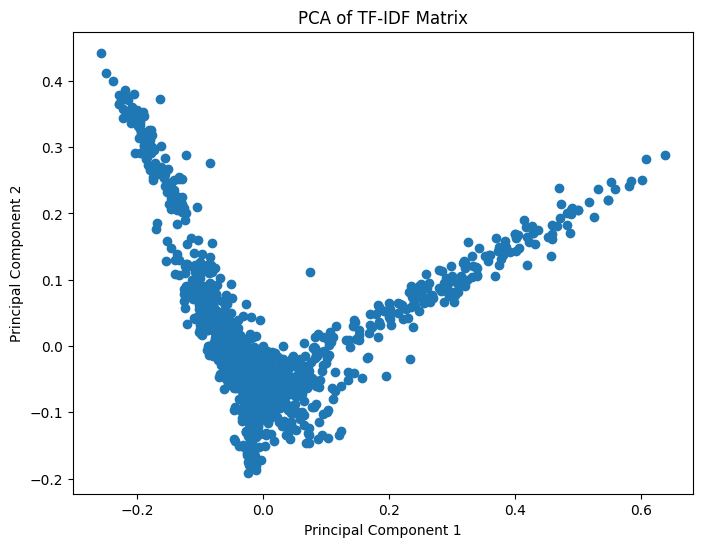

In [ ]:
# prompt: tfidf_df를 주성분분석

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 주성분 분석 객체 생성 (주성분 개수 설정)
pca = PCA(n_components=2)  # 예시로 2개의 주성분으로 축소

# PCA 적용
pca_result = pca.fit_transform(tfidf_df)

# 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(data=pca_result, columns=['principal component 1', 'principal component 2'])

# 원본 DataFrame과 PCA 결과 병합
df_pca = pd.concat([df, pca_df], axis=1)

# 시각화 (선택 사항)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of TF-IDF Matrix')
plt.show()

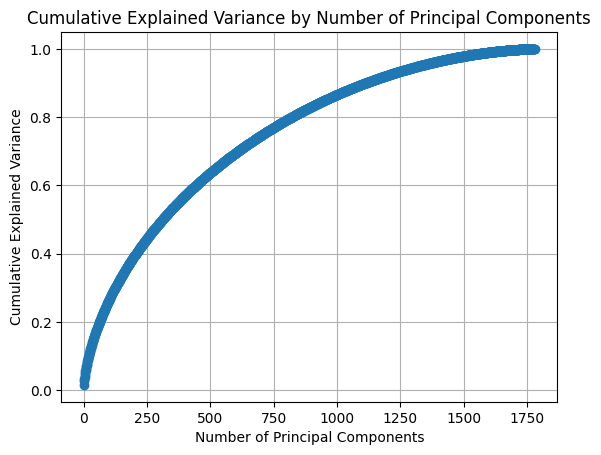

In [ ]:
import numpy as np

# PCA 적용
pca = PCA()
pca.fit(tfidf_df)  # dtm_df 데이터도 적용?

# 각 주성분 개수에 따른 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 총변동량 시각화
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

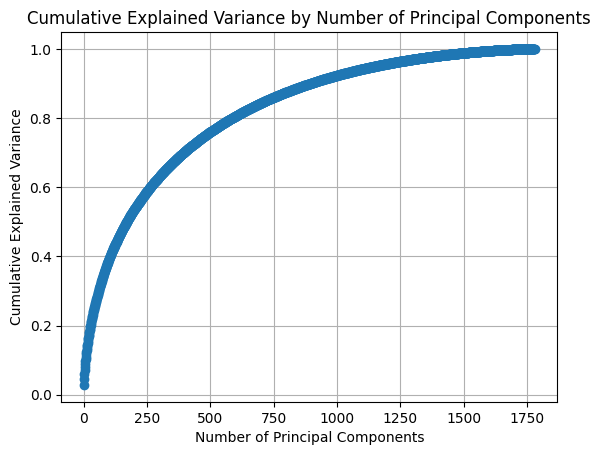

In [ ]:
# PCA 적용
pca = PCA()
pca.fit(dtm_df)

# 각 주성분 개수에 따른 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 총변동량 시각화
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


- 코사인유사성 분석

In [ ]:
# prompt: df 의 코사인 유사성을 계산해다오

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_df)

# Convert to DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_similarities)

# Print or further process the DataFrame
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780
0,1.000000,0.028049,0.045909,0.010535,0.000000,0.072569,0.074785,0.000000,0.017529,0.020552,...,0.011111,0.017449,0.021590,0.067599,0.017047,0.003906,0.000000,0.036682,0.000000,0.000000
1,0.028049,1.000000,0.025975,0.000000,0.000000,0.012910,0.055206,0.000000,0.000000,0.024106,...,0.028930,0.016469,0.015328,0.019902,0.011588,0.000000,0.034485,0.020433,0.000000,0.030053
2,0.045909,0.025975,1.000000,0.000000,0.023393,0.004999,0.014034,0.000000,0.026442,0.008509,...,0.007992,0.048845,0.000000,0.034199,0.000000,0.020681,0.037798,0.000000,0.019163,0.000000
3,0.010535,0.000000,0.000000,1.000000,0.000000,0.012630,0.083525,0.015176,0.000000,0.000000,...,0.000000,0.000000,0.028194,0.000000,0.000000,0.014278,0.000000,0.007787,0.026461,0.000000
4,0.000000,0.000000,0.023393,0.000000,1.000000,0.000000,0.000000,0.000000,0.008119,0.019578,...,0.013371,0.002930,0.000000,0.027740,0.012537,0.000000,0.002342,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.003906,0.000000,0.020681,0.014278,0.000000,0.002753,0.044061,0.003308,0.008002,0.008250,...,0.002780,0.000000,0.007706,0.000000,0.000000,1.000000,0.000000,0.008894,0.021872,0.007220
1777,0.000000,0.034485,0.037798,0.000000,0.002342,0.004467,0.000000,0.000000,0.000000,0.016955,...,0.016593,0.098837,0.032406,0.023196,0.000000,0.000000,1.000000,0.000000,0.000000,0.006143
1778,0.036682,0.020433,0.000000,0.007787,0.000000,0.009924,0.011934,0.000000,0.000000,0.015192,...,0.000000,0.000000,0.000000,0.000000,0.012601,0.008894,0.000000,1.000000,0.058749,0.012600
1779,0.000000,0.000000,0.019163,0.026461,0.000000,0.005102,0.000000,0.047229,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021872,0.000000,0.058749,1.000000,0.000000


In [ ]:
cosine_sim_df.round(2)

,0,1,2,3,4,5,6,7,8,9,...,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780
0,1.00,0.03,0.02,0.00,0.00,0.00,0.02,0.01,0.04,0.00,...,0.00,0.00,0.00,0.02,0.05,0.00,0.00,0.01,0.04,0.02
1,0.03,1.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.02,0.00,0.00,0.05,0.00,0.00,0.00,0.01,0.00
2,0.02,0.00,1.00,0.02,0.00,0.00,0.02,0.01,0.02,0.00,...,0.01,0.00,0.00,0.06,0.04,0.00,0.00,0.01,0.04,0.01
3,0.00,0.00,0.02,1.00,0.01,0.01,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.01
4,0.00,0.00,0.00,0.01,1.00,0.00,0.00,0.00,0.00,0.09,...,0.00,0.00,0.02,0.03,0.00,0.00,0.03,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.00,...,0.01,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.05
1777,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.00
1778,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.02,0.01,...,0.02,0.00,0.00,0.03,0.00,0.00,0.00,1.00,0.01,0.00
1779,0.04,0.01,0.04,0.02,0.00,0.01,0.02,0.02,0.00,0.00,...,0.01,0.01,0.00,0.00,0.04,0.01,0.00,0.01,1.00,0.01


<Axes: >

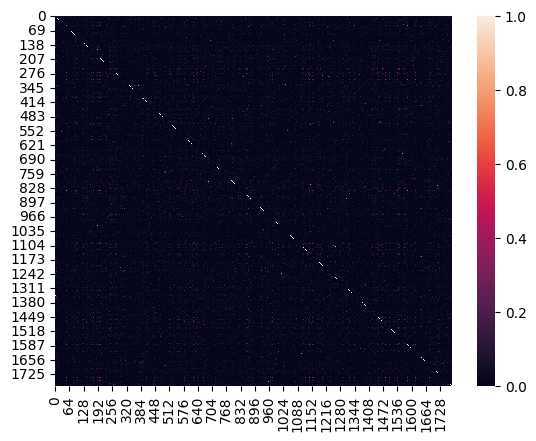

In [ ]:
import seaborn as sns
sns.heatmap(cosine_sim_df.round(2))


- 코사인유사성을 바탕으로 어떤 장르(문학, 과학, 정치 등)가 있는지,
- 즉Clustering 수행하여 그 근거를 제시

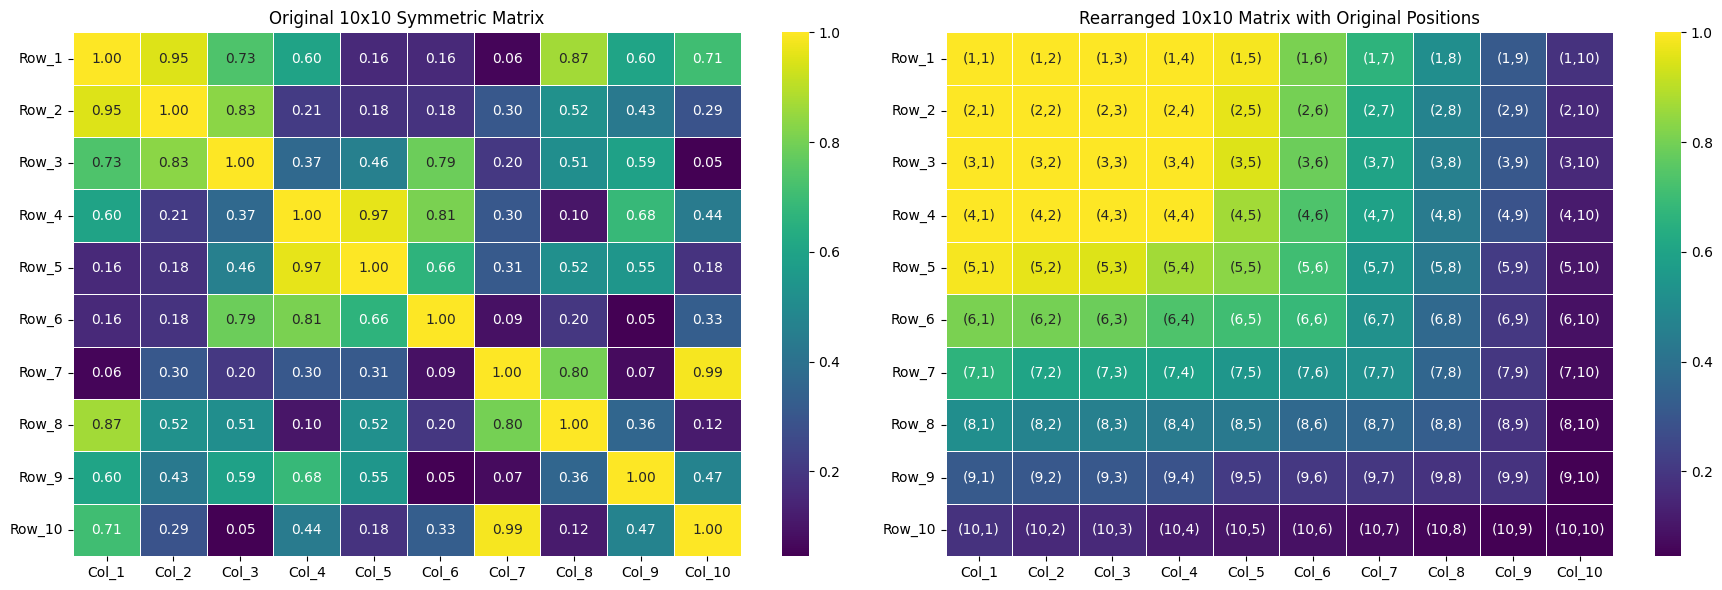

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 10x10 대칭 행렬 생성
np.random.seed(42)  # 재현성을 위해 시드 설정
matrix = np.random.rand(10, 10)

# 대칭 행렬 생성 (대칭성을 유지하기 위해 하삼각형 요소 복사)
for i in range(10):
    for j in range(i + 1, 10):
        matrix[j, i] = matrix[i, j]

# 대각선 값을 모두 1로 설정
np.fill_diagonal(matrix, 1)

# 원래 행렬을 Pandas DataFrame으로 변환
original_df = pd.DataFrame(matrix, columns=[f"Col_{i+1}" for i in range(10)], index=[f"Row_{i+1}" for i in range(10)])

# 대칭 행렬의 모든 값을 큰 순서로 정렬하여 배열
flattened_values = sorted(matrix[np.tril_indices(10)], reverse=True)

# 대칭 행렬을 왼쪽 상단에서 오른쪽 하단으로 큰 값부터 작은 값으로 재배치하고 원래 위치 표시
sorted_matrix = np.zeros((10, 10))
sorted_positions = [["" for _ in range(10)] for _ in range(10)]
k = 0
for i in range(10):
    for j in range(i + 1):
        sorted_matrix[i, j] = flattened_values[k]
        sorted_matrix[j, i] = flattened_values[k]

        # 원래 행렬에서 해당 값의 위치 정보를 기록
        sorted_positions[i][j] = f"({i+1},{j+1})"
        sorted_positions[j][i] = f"({j+1},{i+1})"

        k += 1

# 재배치된 행렬을 Pandas DataFrame으로 변환
sorted_df = pd.DataFrame(sorted_matrix, columns=[f"Col_{i+1}" for i in range(10)], index=[f"Row_{i+1}" for i in range(10)])
position_df = pd.DataFrame(sorted_positions, columns=[f"Col_{i+1}" for i in range(10)], index=[f"Row_{i+1}" for i in range(10)])

# 시각화
plt.figure(figsize=(18, 6))

# 원래 행렬 시각화
plt.subplot(1, 2, 1)
sns.heatmap(original_df, annot=True, cmap='viridis', cbar=True, linewidths=0.5, fmt=".2f")
plt.title('Original 10x10 Symmetric Matrix')

# 재배치된 행렬 시각화
plt.subplot(1, 2, 2)
sns.heatmap(sorted_df, annot=position_df, cmap='viridis', cbar=True, linewidths=0.5, fmt='')
plt.title('Rearranged 10x10 Matrix with Original Positions')

plt.tight_layout()
plt.show()


- LDA 결과
- 감성분석 결과

